# Pytorch  

#### Работа с Pytorch  

`Тензор (tensor)` - это математический и абстрактный объект, который обобщает понятия скаляра, вектора и матрицы.  

**Основные характеристики тензоров:**  

- `Ранг:` Ранг тензора определяет, сколько индексов ему требуется для полной спецификации. Скаляр (тензор нулевого ранга) не требует индексов, вектор (тензор первого   ранга) требует один индекс, матрица (тензор второго ранга) - два индекса, и так далее.  

- `Размерности:` Тензоры имеют размерности, которые определяют, сколько элементов содержится вдоль каждой из их осей.  

- `Компоненты:` Элементы тензора называются его компонентами. Компоненты тензора могут быть числами, функциями или другими объектами в зависимости от контекста.  

## Установка  

https://pytorch.org/ 

```sh
pip3 install torch torchvision torchaudio
```

## Проверка версии  


In [1]:
# через команду pip
!pip show torch

Name: torch
Version: 2.7.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /home/maksim/develops/python/env1/lib/python3.12/site-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, setuptools, sympy, triton, typing-extensions
Required-by: segmentation_models_pytorch, timm, torchaudio, torchvision, ultralytics, ultralytics-thop


In [2]:
# Через conda
!conda list | grep torch

In [3]:
# Через python код
import torch
print(torch.__version__)


2.7.1+cu126


## Информация о cuda используемой PyTorch

In [4]:
import torch
print(torch.version.cuda)          # версия CUDA, с которой собран PyTorch
print(torch.cuda.is_available())   # доступна ли CUDA на вашем устройстве (True/False)
print(torch.cuda.current_device()) # номер текущего CUDA-устройства
print(torch.cuda.get_device_name(0)) # имя первого CUDA-устройства



12.6
True
0
NVIDIA GeForce RTX 3060


## работа с Pytorch

In [5]:
# создание тензора
import torch
x = torch.tensor([1.0, 2.0, 3.0])
print(x)


tensor([1., 2., 3.])


In [6]:
# для работы с GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    x = x.to(device)
    print(f"Tensor is on device: {x.device}")
else:
    print("CUDA is not available.")


Tensor is on device: cuda:0


### Создание тензоров

In [7]:
import torch
import numpy as np

# из numpy
numpy_array = np.array([1, 2, 3])
tensor_from_numpy = torch.from_numpy(numpy_array)
print("Тензор из NumPy массива:")
print(tensor_from_numpy)


# Создание тензора из списка
tensor = torch.tensor([[1, 2], [3, 4]])
print(tensor)

# Тензор из нулей
zeros = torch.zeros(3, 4)
print(zeros)

# Тензор из единиц
ones = torch.ones(2, 3)
print(ones)

# Тензор с равномерно распределёнными значениями
linspace = torch.linspace(0, 1, steps=5)
print(linspace)

# Одномерный тензор с диапазоном значений
arange = torch.arange(0, 10, step=2)
print(arange)

# тензор из распределений
random_uniform = torch.rand(2, 2)
print("\nТензор со случайными числами (равномерное распределение):")
print(random_uniform)

random_normal = torch.randn(2, 2)
print("\nТензор со случайными числами (нормальное распределение):")
print(random_normal)

random_int = torch.randint(0, 10, (2, 3))
print("\nТензор со случайными целыми числами:")
print(random_int)

# похожий тензор
tensor_ref = torch.tensor([[1, 2], [3, 4]])
zeros_like = torch.zeros_like(tensor_ref)
print("\nТензор из нулей, как reference тензор:")
print(zeros_like)

# Единичная матрица
identity_matrix = torch.eye(3)
print("\nЕдиничная матрица:")
print(identity_matrix)

# Тензор заполненный одним значением
full_tensor = torch.full((2, 3), 7.0)
print("\nТензор, заполненный одним значением:")
print(full_tensor)



Тензор из NumPy массива:
tensor([1, 2, 3])
tensor([[1, 2],
        [3, 4]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])
tensor([0, 2, 4, 6, 8])

Тензор со случайными числами (равномерное распределение):
tensor([[0.6790, 0.8887],
        [0.8453, 0.2497]])

Тензор со случайными числами (нормальное распределение):
tensor([[-0.6695,  0.0303],
        [-1.1026, -0.8060]])

Тензор со случайными целыми числами:
tensor([[9, 6, 2],
        [7, 4, 0]])

Тензор из нулей, как reference тензор:
tensor([[0, 0],
        [0, 0]])

Единичная матрица:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

Тензор, заполненный одним значением:
tensor([[7., 7., 7.],
        [7., 7., 7.]])


### операции

пример того, как меняются операции:  

* `x.reshape([1,2,8]) -> x.view(1,2,8)`  

* `x.sum(axis=-1) -> x.sum(dim=-1)`  

* `x.astype("int64") -> x.type(torch.LongTensor)`  

Для помощи  [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет найти аналог **NumPy** операции в **PyTorch**  

In [8]:
# Арифметические операции поэлементно:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

print(a + b)  # tensor([5, 7, 9])
print(a * b)  # tensor([4, 10, 18])
print(b / a)  # tensor([4.0000, 2.5000, 2.0000])

# Операции с числами (скалярами):
c = torch.tensor([1, 2, 3])
print(c + 5)  # tensor([6, 7, 8])
print(c * 2)  # tensor([2, 4, 6])

# Индексирование и срезы работают как в numpy:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x[0, 1])    # 2
print(x[:, 1:3])  # все строки, столбцы с 1 по 2




tensor([5, 7, 9])
tensor([ 4, 10, 18])
tensor([4.0000, 2.5000, 2.0000])
tensor([6, 7, 8])
tensor([2, 4, 6])
tensor(2)
tensor([[2, 3],
        [5, 6]])


In [9]:
x= torch.tensor([[1,2,3],[4,5,6]])
y= torch.tensor([[7,8,9], [10,11,12]])
f= x + y
print('torch:\n', f)
print('тип:', f.type())
f = f.float()
print('torch:\n', f)
print('тип:', f.type())
print("среднее:\n", torch.mean(f, 1))
print('транспонирование:\n', f.transpose(1, 0))

torch:
 tensor([[ 8, 10, 12],
        [14, 16, 18]])
тип: torch.LongTensor
torch:
 tensor([[ 8., 10., 12.],
        [14., 16., 18.]])
тип: torch.FloatTensor
среднее:
 tensor([10., 16.])
транспонирование:
 tensor([[ 8., 14.],
        [10., 16.],
        [12., 18.]])


In [10]:
x= torch.tensor([[2,3,4],[5,6,7]])
y= torch.tensor([[1,3],[1,1], [1,1]])
print("Матричное умножение x @ y:\n", x @ y)

x= torch.tensor([[2,3],[5,6]])
y= torch.tensor([[1,3],[1,1]])
print("Поэлементное умножение x * y:\n", x * y)



Матричное умножение x @ y:
 tensor([[ 9, 13],
        [18, 28]])
Поэлементное умножение x * y:
 tensor([[2, 9],
        [5, 6]])


In [11]:
x = torch.rand(2, 3, 2)
print("тензор:\n", x)
print("Транспонирование:\n", x.transpose(1, 0))

тензор:
 tensor([[[0.3391, 0.2428],
         [0.2053, 0.1704],
         [0.6671, 0.2200]],

        [[0.6988, 0.1131],
         [0.8432, 0.1329],
         [0.8115, 0.3326]]])
Транспонирование:
 tensor([[[0.3391, 0.2428],
         [0.6988, 0.1131]],

        [[0.2053, 0.1704],
         [0.8432, 0.1329]],

        [[0.6671, 0.2200],
         [0.8115, 0.3326]]])


In [ ]:
%%time
# ПАКЕТНОЕ УМНОЖЕНИЕ (батч)
# Создаем батч матриц (трехмерные тензоры)
batch_A = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
batch_B = torch.tensor([[[9, 10], [11, 12]], [[13, 14], [15, 16]]])

# Выполняем пакетное матричное умножение
result = torch.bmm(batch_A, batch_B)  # Работает только с 3D тензорами

print("Результат bmm:\n", result)



Результат bmm:
 tensor([[[ 31,  34],
         [ 71,  78]],

        [[155, 166],
         [211, 226]]])
CPU times: user 0 ns, sys: 1.03 ms, total: 1.03 ms
Wall time: 731 μs


In [ ]:
%%time
# Создаем батч матриц (трехмерные тензоры)
batch_A = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
batch_B = torch.tensor([[[9, 10], [11, 12]], [[13, 14], [15, 16]]])

# Выполняем пакетное матричное умножение 
result = torch.matmul(batch_A, batch_B) # так предпочтительнее

print("Результат matmul:\n", result)

Результат matmul:
 tensor([[[ 31,  34],
         [ 71,  78]],

        [[155, 166],
         [211, 226]]])
CPU times: user 1.59 ms, sys: 0 ns, total: 1.59 ms
Wall time: 1.19 ms


### Преобразование тензора

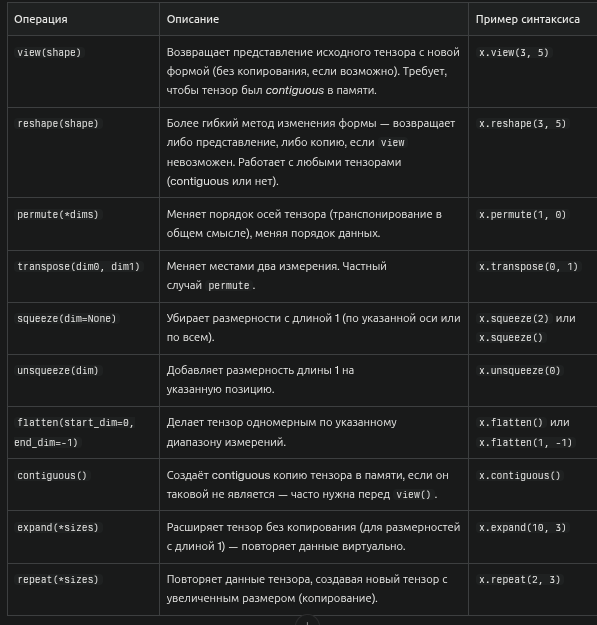 

In [ ]:
# решейп
x = torch.rand(5, 3)
print("тензор:\n", x)
print("решейп view:\n", x.view([3, 5]))
print("решейп reshape:\n", x.reshape([3, 5])) # предпочтительней не требует непрерывной памяти


тензор:
 tensor([[0.4206, 0.9752, 0.7356],
        [0.0108, 0.6319, 0.8627],
        [0.2197, 0.8226, 0.8879],
        [0.4053, 0.1408, 0.8286],
        [0.1097, 0.5242, 0.8494]])
решейп view:
 tensor([[0.4206, 0.9752, 0.7356, 0.0108, 0.6319],
        [0.8627, 0.2197, 0.8226, 0.8879, 0.4053],
        [0.1408, 0.8286, 0.1097, 0.5242, 0.8494]])
решейп reshape:
 tensor([[0.4206, 0.9752, 0.7356, 0.0108, 0.6319],
        [0.8627, 0.2197, 0.8226, 0.8879, 0.4053],
        [0.1408, 0.8286, 0.1097, 0.5242, 0.8494]])


In [19]:
import torch

x = torch.arange(24).reshape(2, 3, 4)

print("Original:", x.shape)  # torch.Size([2, 3, 4])

# Изменение формы
y = x.reshape(3, 8)
print("Reshape:", y.shape)   # torch.Size([3, 8])

# Переупорядочивание осей
z = x.permute(1, 0, 2)
print("Permute:", z.shape)   # torch.Size([3, 2, 4])

# Транспонирование двух осей
t = x.transpose(0, 1)
print("Transpose:", t.shape) # torch.Size([3, 2, 4])

# Добавление размерности
u = x.unsqueeze(0)
print("Unsqueeze:", u.shape) # torch.Size([1, 2, 3, 4])

# Удаление размерности
v = u.squeeze(0)
print("Squeeze:", v.shape)   # torch.Size([2, 3, 4])

# Выравнивание (флэттен)
f = x.flatten(1) 
print("Flatten:", f.shape)   # torch.Size([2, 12])


Original: torch.Size([2, 3, 4])
Reshape: torch.Size([3, 8])
Permute: torch.Size([3, 2, 4])
Transpose: torch.Size([3, 2, 4])
Unsqueeze: torch.Size([1, 2, 3, 4])
Squeeze: torch.Size([2, 3, 4])
Flatten: torch.Size([2, 12])


#### Размеры

In [7]:
# случайный тензор
x = torch.rand(2, 3, 2)
x

tensor([[[0.3937, 0.9492],
         [0.1356, 0.8570],
         [0.6519, 0.0153]],

        [[0.3597, 0.7916],
         [0.8614, 0.2602],
         [0.4994, 0.2804]]])

In [12]:
# Размеры тензора
print(x.size())
print(x.shape)

torch.Size([2, 3, 2])
torch.Size([2, 3, 2])


#### сравнение с numpy

In [ ]:
x= np.array([[1,2,3],[4,5,6]])
y= np.array([[7,8,9], [10,11,12]])
f= x + y
print('numpy:\n', f)
print("среднее:\n", f.mean(axis=0))
print('транспонирование:\n', f.transpose(1, 0))


numpy:
 [[ 8 10 12]
 [14 16 18]]
среднее [11. 13. 15.]
транспонирование [[ 8 14]
 [10 16]
 [12 18]]


In [27]:
x= torch.tensor([[1,2,3],[4,5,6]])
y= torch.tensor([[7,8,9], [10,11,12]])
f= x + y
print('torch:\n', f)
print('тип:', f.type())
f = f.float()
print('torch:\n', f)
print('тип:', f.type())
print("среднее:\n", torch.mean(f, 1))
print('транспонирование:\n', f.transpose(1, 0))


torch:
 tensor([[ 8, 10, 12],
        [14, 16, 18]])
тип: torch.LongTensor
torch:
 tensor([[ 8., 10., 12.],
        [14., 16., 18.]])
тип: torch.FloatTensor
среднее:
 tensor([10., 16.])
транспонирование:
 tensor([[ 8., 14.],
        [10., 16.],
        [12., 18.]])


### создание тензора, вычисление градиента

In [77]:
import torch

# Создаем тензор с включенным отслеживанием градиентов
x = torch.tensor([2.0, 3.0], requires_grad=True)

# Выполняем операцию
y = x ** 2 + 3 * x + 1

# Считаем сумму для удобства
z = y.sum()

# Вычисляем градиенты
z.backward()

print(x.grad)  # tensor([7., 9.]) — производные по x

# Перенос на GPU (если доступен)
if torch.cuda.is_available():
    x_gpu = x.to('cuda')
    print(x_gpu.device)  # cuda:0


tensor([7., 9.])
cuda:0


In [79]:
''' 
y = x ** 2  # y — тензор с несколькими элементами
y.backward()  # вызовет ошибку
'''

y = x ** 2
y.sum().backward()  # теперь y — скаляр, ошибка исчезнет

In [ ]:
y = x ** 2
y.backward(torch.ones_like(y))  # явно передаем градиенты  


In [ ]:
# Если два раза вызвать y.backward(torch.ones_like(y))  будет ошибка
''' 
y.backward(torch.ones_like(y)) 
y.backward(torch.ones_like(y)) 
'''
# По умолчанию, после вызова .backward(), вычислительный граф, который PyTorch строит для отслеживания операций и вычисления градиентов, удаляется.

In [82]:
import torch

x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x * 2

# Первый вызов: сохраняем граф
y.backward(torch.ones_like(y), retain_graph=True)
print("Градиенты после первого backward:", x.grad)

# Сбрасываем градиенты (важно, чтобы не накапливались)
x.grad.zero_()

# Второй вызов: используем сохраненный граф
y.backward(torch.ones_like(y)) # retain_graph=True здесь не обязательно, если это последний вызов
print("Градиенты после второго backward:", x.grad)


Градиенты после первого backward: tensor([2., 2., 2.])
Градиенты после второго backward: tensor([2., 2., 2.])


### Перенос на GPU

In [ ]:

import torch
tensor = torch.tensor([1, 2, 3])

# Перенесите тензор на GPU, если доступен
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

# Проверьте устройство тензора
device_name = str(tensor.device)
print(device_name)

tensor2 = torch.tensor([1, 2, 3])

device_name2 = str(tensor2.device)
print(device_name2)

cuda:0
cpu


## Сравнение с numpy

**В чем же разница?**.  

1) Автоматическое дифференцирование:  
- `NumPy:` NumPy не предоставляет встроенной поддержки для автоматического дифференцирования. Это означает, что вы должны явным образом вычислять градиенты при  необходимости, что может быть неудобно при разработке сложных моделей машинного обучения.  

- `PyTorch:` PyTorch обеспечивает автоматическое дифференцирование через свой модуль `autograd`. Это позволяет легко вычислять градиенты функций и использовать их в  процессе обучения нейронных сетей. Эта функциональность делает PyTorch более подходящим для глубокого обучения и исследований.  

2) Оптимизация на GPU
 - `NumPy:` NumPy поддерживает вычисления на CPU, но для оптимизации на GPU требуется использовать дополнительные библиотеки, такие как CuPy. 

 - `PyTorch:` PyTorch предоставляет встроенную поддержку для оптимизации на графических процессорах (GPU) с помощью CUDA. Это позволяет ускорять обучение нейронных сетей  и другие вычисления, используя мощности GPU. 


### Плюс Numpy:  
`Производительность на CPU:`   
 В некоторых случаях NumPy может предоставить более оптимизированные вычисления на CPU, особенно если вы работаете с большими массивами данных и используете оптимизированные библиотеки BLAS (Basic Linear Algebra Subprograms).

In [1]:
import torch

# создаем тензор ранга 3 размером 2x2x2 со случайными значениями
tensor_torch = torch.ones(2, 2, 2)

# Выводим созданный тензор
print(tensor_torch)

# Определяем объем памяти, занимаемый тензором в байтах
memory_bytes_torch = tensor_torch.element_size() * tensor_torch.nelement()


import numpy as np

# Создаем тензор ранга 3 размером 2x2x2 со случайными значениями
tensor_numpy = np.ones((2, 2, 2))

# Выводим созданный тензор
print(tensor_numpy)


# Определяем объем памяти, занимаемый массивом в байтах
memory_bytes_numpy = tensor_numpy.nbytes


# Выводим объем памяти
print(f"Объем памяти, занимаемый массивом: {memory_bytes_numpy} байт")

print(f"Объем памяти, занимаемый тензором: {memory_bytes_torch} байт")

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])
[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]
Объем памяти, занимаемый массивом: 64 байт
Объем памяти, занимаемый тензором: 32 байт
